<a href="https://colab.research.google.com/github/Camillabgarcia/data_science/blob/main/Testando_hipoteses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# carregando bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
#Leitura dos dados

# idade de aponsentadoria
dados_idade_aposentadoria = pd.read_csv("/content/dados_idade_aposentadoria.csv")

# Tempo de Vida de uma Lâmpada
dados_vida_lampada = pd.read_csv("/content/dados_vida_lampada.csv")

# Altura dos funcionarios
dados_alturas = pd.read_csv("/content/dados_alturas.csv")

In [17]:
dados_alturas.head()

,alturas
0,167.52
1,185.21
2,172.74
3,171.52
4,157.75


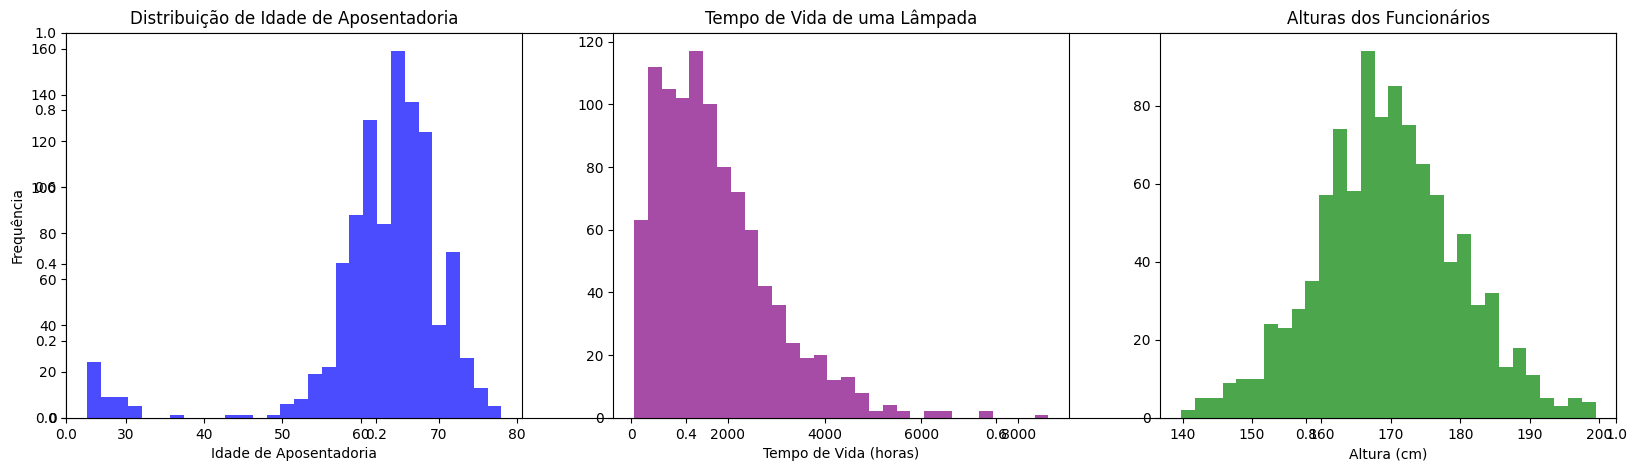

In [6]:
# Várias distribuições
plt.subplots(figsize=(20, 5))
plt.subplot(131)
plt.title('Distribuição de Idade de Aposentadoria')
plt.xlabel('Idade de Aposentadoria')
plt.ylabel('Frequência')
plt.hist(dados_idade_aposentadoria, bins=30, alpha=0.7, color='blue')

plt.subplot(132)
plt.hist(dados_vida_lampada, bins=30, alpha=0.7, color='purple')
plt.title('Tempo de Vida de uma Lâmpada')
plt.xlabel('Tempo de Vida (horas)')

plt.subplot(133)
plt.hist(dados_alturas, bins=30, alpha=0.7, color='green')
plt.title('Alturas dos Funcionários')
plt.xlabel('Altura (cm)')

plt.show()

Reamostragem de dados de uma indústria de lâmpadas:


In [7]:
from os import replace
#Tamanho de amostra de cada
n = 100

#Quantidade de amostras
qtd = 1000

#Função de reamostragem e cálculo de médias
def reamostragem_medias(dados, coluna, n, qtd):
  medias = [dados[coluna].sample(n, replace=True).mean()for _ in range(qtd)]
  return medias

Aplicando a função em cada distribuição:

In [8]:
media_idade = reamostragem_medias(dados_idade_aposentadoria, 'idade', n, qtd)
media_duracao = reamostragem_medias(dados_vida_lampada, 'duracao', n, qtd)
media_altura = reamostragem_medias(dados_alturas, 'alturas', n, qtd)

Médias das distribuições originais:

In [28]:
print('idade', dados_idade_aposentadoria['idade'].mean())
print('duracao', dados_vida_lampada['duracao'].mean())
print('alturas', dados_alturas['alturas'].mean())

idade 62.70857142857143
duracao 1731.8036029420002
alturas 169.52022


Médias Amostrais:

In [31]:
def Average(lst):
  return sum(lst) / len(lst)

print('idade', Average(media_idade))
print('duracao', Average(media_duracao))
print('altura', Average(media_altura))

idade 62.72236999999997
duracao 1731.37591870465
altura 169.50142320000003


Distribuição das médias com subplots:

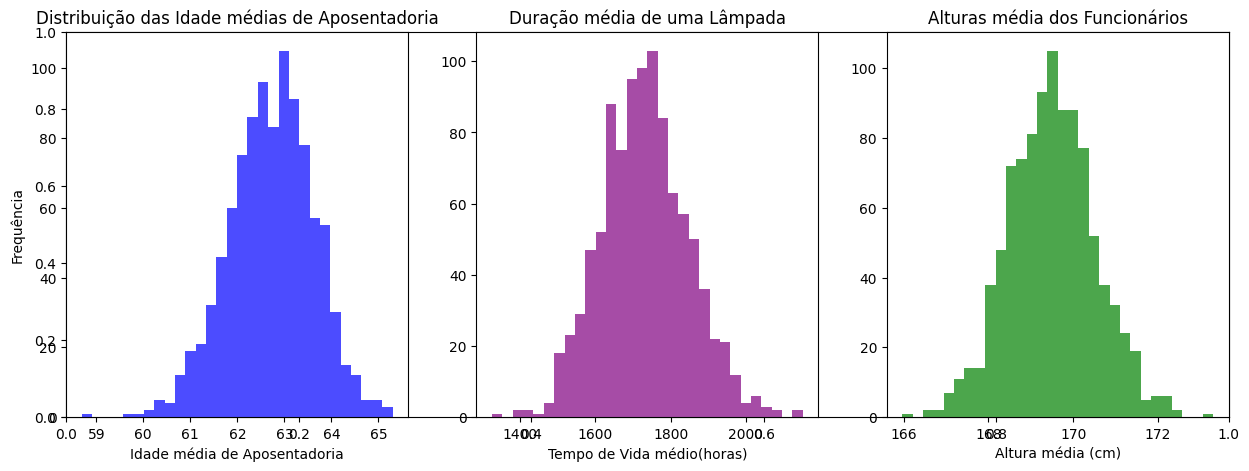

In [30]:
plt.subplots(figsize=(15, 5))
plt.subplot(131)
plt.title('Distribuição das Idade médias de Aposentadoria')
plt.xlabel('Idade média de Aposentadoria')
plt.ylabel('Frequência')
plt.hist(media_idade, bins=30, alpha=0.7, color='blue')

plt.subplot(132)
plt.hist(media_duracao, bins=30, alpha=0.7, color='purple')
plt.title('Duração média de uma Lâmpada')
plt.xlabel('Tempo de Vida médio(horas)')

plt.subplot(133)
plt.hist(media_altura, bins=30, alpha=0.7, color='green')
plt.title('Alturas média dos Funcionários')
plt.xlabel('Altura média (cm)')

plt.show()

Média da nova amostra:

In [32]:
media_nova_amostra = 1200

Média orginal:

In [33]:
dados_vida_lampada['duracao'].mean()

np.float64(1731.8036029420002)

Quão distante essa média está do comportamento?



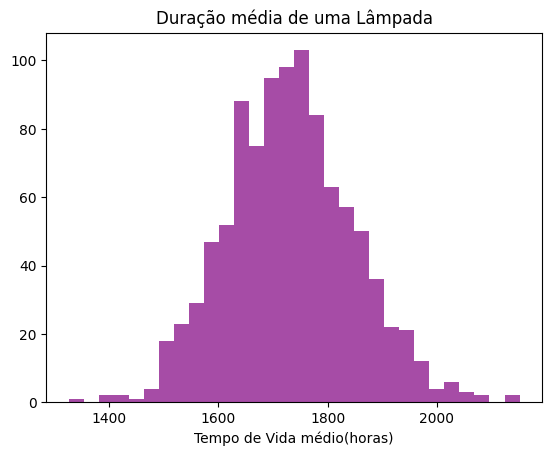

In [37]:
plt.hist(media_duracao, bins=30, alpha=0.7, color='purple')
plt.title('Duração média de uma Lâmpada')
plt.xlabel('Tempo de Vida médio(horas)')
plt.annotate('.', xy=(media_nova_amostra, 0), xytext=(media_nova_amostra, 100), fontsize=8,
             arrowprops=dict(facecolor='green'))
plt.show()

Transformando media_duracao em DataFrame:

In [39]:
duracao_amostra = pd.DataFrame({'media_duracao': media_duracao})

Calculando informações:

In [40]:
media_das_medias = duracao_amostra['media_duracao'].mean()
erro_padrao = duracao_amostra['media_duracao'].std()

print('Médias amostrais')
print('média:', media_das_medias)
print('desvio padrão:', erro_padrao)

Médias amostrais
média: 1731.3759187046498
desvio padrão: 115.82310482267512


Quantos erros:

In [42]:
1731 - 3*erro_padrao

1383.5306855319745

Visualizando a quantidade de amostras entre 3EP +- da média

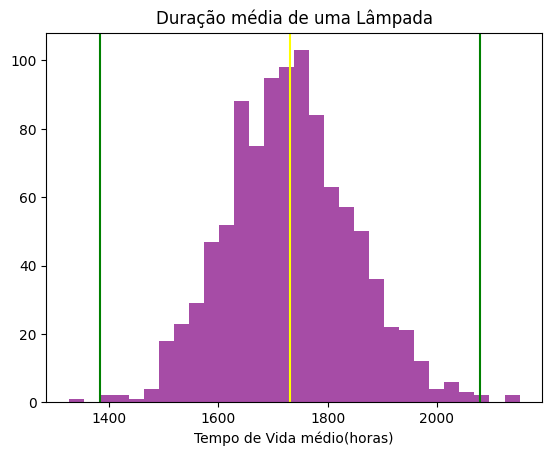

In [44]:
plt.hist(media_duracao, bins=30, alpha=0.7, color='purple')
plt.title('Duração média de uma Lâmpada')
plt.xlabel('Tempo de Vida médio(horas)')
plt.axvline(x=media_das_medias, color = 'yellow')
plt.axvline(x=media_das_medias + 3*erro_padrao, color = 'green')
plt.axvline(x=media_das_medias - 3*erro_padrao, color = 'green')
plt.annotate('.', xy=(media_nova_amostra, 0), xytext=(media_nova_amostra, 100), fontsize=8,
             arrowprops=dict(facecolor='green'))
plt.show()